# Graded Challenge 2

# Introduction

Nama: Karina Maharani Utomo 
<br>
Batch: 003 
<br>
Hacktiv8 Full Time Data Science

Pada Graded Challenge ini, akan dilakukan image processing terhadap gambar yang didapat dari https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg.

Objektif dari Graded Challenge ini adalah mendeteksi edge suatu gambar dan melakukan operasi perkalian matriks. 

Untuk mendeteksi edge suatu gambar, langkah-langkah yang akan dilakukan adalah sebagai berikut:
1. Menghitung vektor gradien
2. Menghitung gradient magnitude tiap pixel
3. Menentukan nilai threshold. Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi

Untuk operasi perkalian matriks, akan dibuat matriks dengan ukuran yang bersesuaian untuk dikalikan dengan matriks dari gambar

# Import Libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

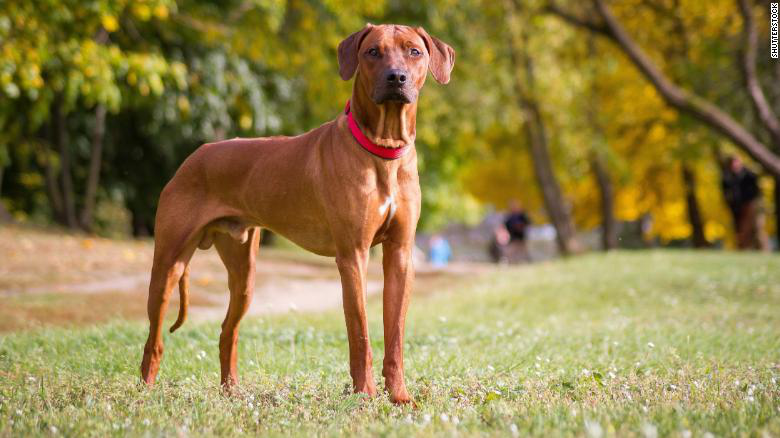

In [2]:
# Loading dan menampilkan image

image = Image.open(r'/Users/karinautomo/Downloads/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')
image

In [3]:
# Menampilkan ukuran dari image

image.size

(780, 438)

# Data Preprocessing

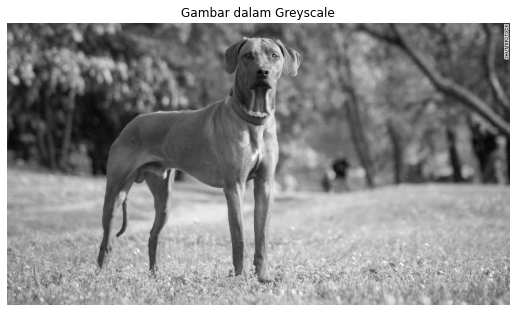

In [4]:
# Melakukan konversi image ke dalam greyscale agar memudahkan proses edge detection

I = image.convert('L')

plt.figure(figsize=(9,6))
plt.imshow(I, cmap = 'gray')
plt.title('Gambar dalam Greyscale')
plt.axis('off')

plt.show()

In [5]:
# Mengubah image menjadi array

I = np.array(I)

In [6]:
# Menampilkan ukuran dari array

np.array(I).shape

(438, 780)

# Image Processing

**Menghitung vektor gradien dengan rumus** $\frac{\partial I}{\partial x}$ dan $\frac{\partial I}{\partial y}$

In [7]:
# Menghitung vektor gradien
# Hasil turunan parsial terhadap sumbu x dan y disimpan ke dalam 2 variabel berbeda

grad_x, grad_y = np.gradient(I)

In [8]:
# Menampilkan hasil turunan parsial terhadap sumbu x

grad_x

array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
       [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
       [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
       ...,
       [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
       [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
       [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]])

In [9]:
# Menampilkan hasil turunan parsial terhadap sumbu y

grad_y

array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
       [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
       [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
       ...,
       [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
       [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
       [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])

***
**Menghitung gradient magnitude dengan rumus** $mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}$

In [10]:
# Menghitung gradient magnitude & menampilkan hasilnya

mag = np.sqrt(grad_x**2 + grad_y**2)
mag

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

In [11]:
mag.shape

(438, 780)

In [12]:
np.max(mag)

179.60512242138307

***
**Menentukan nilai threshold**

In [13]:
# Menseleksi nilai magnitude yang lebih dari 30 (threshold = 30)
# Untuk background berwarna hitam, semua nilai <= 30 ditetapkan sebagai 0

t30_black = np.where(mag>30, mag, 0)
t30_black

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 107.54185232,
          0.        ,  31.2409987 ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [14]:
# Menseleksi nilai magnitude yang lebih dari 30 (threshold = 30)
# Untuk background berwarna putih, semua nilai <= 30 ditetapkan sebagai 180

t30_white = np.where(mag>30, mag, 180)
t30_white

array([[180.        , 180.        , 180.        , ..., 180.        ,
        180.        , 180.        ],
       [180.        , 180.        , 180.        , ..., 180.        ,
        180.        , 180.        ],
       [180.        , 180.        , 180.        , ..., 107.54185232,
        180.        ,  31.2409987 ],
       ...,
       [180.        , 180.        , 180.        , ..., 180.        ,
        180.        , 180.        ],
       [180.        , 180.        , 180.        , ..., 180.        ,
        180.        , 180.        ],
       [180.        , 180.        , 180.        , ..., 180.        ,
        180.        , 180.        ]])

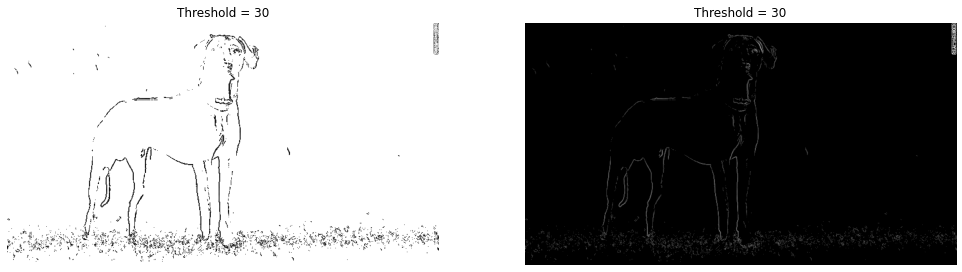

In [15]:
# Menampilkan hasil edge detection dengan nilai threshold 30

fig = plt.figure(figsize=(17,10))
row = 2
col = 2

fig.add_subplot(row, col, 1)
plt.imshow(t30_white, cmap = 'gray')
plt.title('Threshold = 30')
plt.axis('off')

fig.add_subplot(row, col, 2)
plt.imshow(t30_black, cmap = 'gray')
plt.title('Threshold = 30')
plt.axis('off')

plt.show()

Untuk Graded Challenge kali ini, akan dipilih opsi background berwarna putih agar hasil edge detection dapat lebih terlihat

In [16]:
t30_white.shape

(438, 780)

In [17]:
# Membuat function agar dapat membandingkan hasil edge detection dari berbagai nilai threshold

def t(threshold):
    thresh = np.where(mag>threshold, mag, 180)
    return plt.imshow(thresh, cmap = 'gray')

***
4. Perkalian matriks

In [18]:
# Menampilkan kembali ukuran dari matriks gambar

I.shape

(438, 780)

In [19]:
# Membuat matriks berisi angka random untuk dikalikan dengan matriks gambar
# Jumlah baris dari matriks random dibuat sama dengan jumlah kolom pada matriks gambar

random = np.random.rand(780, 500)
random

array([[0.07552904, 0.78425533, 0.67060818, ..., 0.37135989, 0.01519547,
        0.51482432],
       [0.61612494, 0.94282126, 0.48870019, ..., 0.7323114 , 0.07077188,
        0.3418835 ],
       [0.26377702, 0.13923801, 0.99503384, ..., 0.17125089, 0.44621234,
        0.28656013],
       ...,
       [0.7189402 , 0.67775194, 0.97897647, ..., 0.02433727, 0.66074794,
        0.90495051],
       [0.38633307, 0.54538474, 0.96352463, ..., 0.90412251, 0.81955014,
        0.82154708],
       [0.3127432 , 0.45514514, 0.23212905, ..., 0.08289251, 0.80630028,
        0.97690495]])

In [20]:
random.shape

(780, 500)

# Results and Conclusions

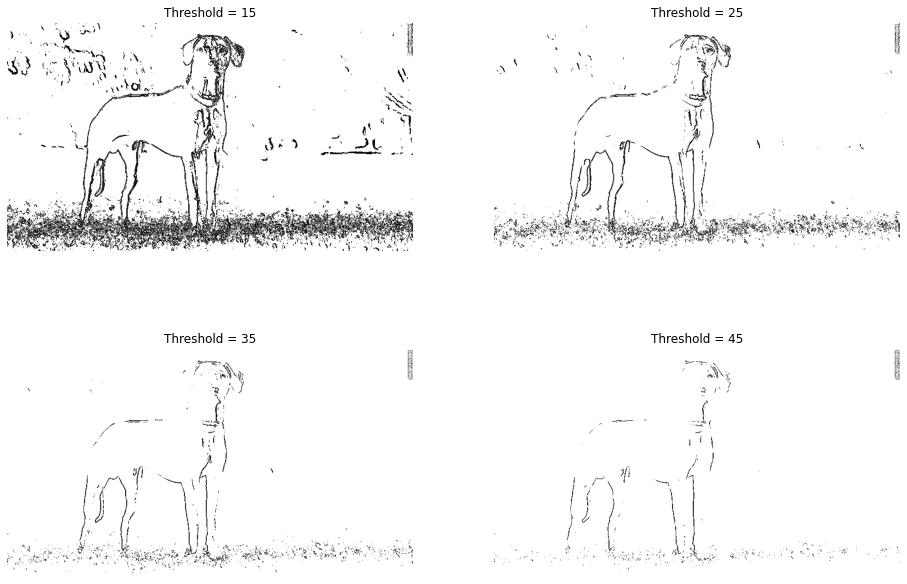

In [21]:
# Membandingkan hasil edge detection nilai threshold 15, 25, 35, 45

fig = plt.figure(figsize=(16,11))
row = 2
col = 2

fig.add_subplot(row, col, 1)
t(15)
plt.title('Threshold = 15')
plt.axis('off')
  
fig.add_subplot(row, col, 2)
t(25)
plt.title('Threshold = 25')
plt.axis('off')
  
fig.add_subplot(row, col, 3)
t(35)
plt.title('Threshold = 35')
plt.axis('off')

fig.add_subplot(row, col, 4)
t(45)
plt.title('Threshold = 45')
plt.axis('off')

plt.show()

Dari perbandingan hasil edge detection dengan nilai threshold yang beragam, dapat dilihat bahwa semakin tinggi nilai threshold yang ditetapkan, akan semakin sedikit tepi dari objek-objek pada gambar yang terlihat. 

   - Untuk threshold = 15, tepi dari anjing, rumput, dan latar belakang yang berupa pepohonan terlihat dengan jelas
   - Untuk threshold = 25, tepi dari anjing dan rumput masih terlihat dengan jelas dan tepi dari latar belakang mulai kurang terlihat
   - Untuk threshold = 35, tepi dari anjing dan rumput masih terlihat, tapi mulai berkurang. Sedangkan untuk tepi dari latar belakang, sudah hampir tidak terlihat
   - Untuk threshold = 45, tepi dari anjing dan rumput semakin kurang terlihat, dan tepi dari latar belakang sudah tidak terlihat sama sekali

***
Hasil perkalian matriks gambar dan matriks random adalah sebagai berikut:

In [22]:
# Mengalikan matriks gambar dengan matriks random

multiply = I@random
multiply

array([[38293.55815343, 38041.77134968, 38478.22008406, ...,
        38355.8846517 , 37798.89445939, 37260.52517932],
       [38133.32677209, 37885.66383505, 38297.709854  , ...,
        38202.04152767, 37644.25855396, 37118.98264164],
       [37976.70563323, 37688.78794638, 38077.28100191, ...,
        37991.92993276, 37470.45411038, 36971.75512499],
       ...,
       [66105.24956482, 66154.2836011 , 66250.92699608, ...,
        66274.86199274, 65739.6138152 , 64651.4543176 ],
       [66184.95777428, 66199.4509215 , 66350.13357801, ...,
        66291.08527975, 65821.8433679 , 64725.63622562],
       [66153.32327797, 66133.88867741, 66306.58196972, ...,
        66219.41850726, 65779.87175667, 64667.2807    ]])

In [23]:
# Menampilkan ukuran matriks hasil perkalian

multiply.shape

(438, 500)

Matriks hasil perkalian memiliki ukuran 438 x 500

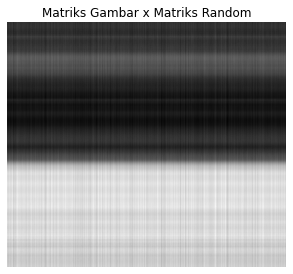

In [24]:
# Menampilkan matriks perkalian dalam bentuk gambar

plt.figure(figsize=(5,5))
plt.imshow(multiply, cmap = 'gray')
plt.title('Matriks Gambar x Matriks Random')
plt.axis('off')

plt.show()

Dapat dilihat bahwa gambar dari matriks hasil perkalian tidak membentuk suatu objek tertentu